<a href="https://colab.research.google.com/github/Vags18/Internship--University_Of_Belgrade_Serbia/blob/main/UoB_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data used for our analysis.: <br/>We have used the data from 8th May to 28th May.
<br/>We will consider the frequencies only from 0 to 100 for the noise level analysis.<br/>The dataset extracted will be considered as the data of only 1 location.

STEP 1: Data Extraction

In [ ]:
import pandas as pd
import json
import requests

In [ ]:
res_api=requests.get('https://crowdsensing.elab.fon.bg.ac.rs/api/data-protected/f0b15414a63813e2d7f29e53d5d8d68d?page=1&limit=10000&from=2019-05-08&to=2019-05-29',verify=False)
print(res_api.status_code)

/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:842: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn((


200


In [ ]:
resobj=res_api.json()

In [ ]:
keys=["_id","datetime","mac","lat","lon"]
df_lst=[]

for data in resobj:
  raw_dict={}
  for key in keys:
    raw_dict[key]=data[key]
  lst=[]
  lst.append(raw_dict)
  df1=pd.DataFrame(lst)
  analstr=data["analysis"]
  filtered_str=",".join(analstr.split("},{"))
  analobj=json.loads(filtered_str)
  df2=pd.DataFrame(analobj)
  df_lst.append(pd.concat([df1,df2],axis=1,join='inner'))

df=pd.concat(df_lst,ignore_index=True)
df

,_id,datetime,mac,lat,lon,0,5,10,15,20,...,3150,3155,3160,3165,3170,3175,3180,3185,3190,3195
0,5cd2488491417,2019-05-08T05:09:56Z,84:9F:B5:DF:F8:4B,55.826738,45.042341,0.369656,0.103913,0.086884,0.068826,0.048516,...,0.000542,0.000559,0.000547,0.000553,0.000523,0.000537,0.000524,0.000542,0.000531,0.000520
1,5cd2626930eab,2019-05-08T07:00:25Z,50:A7:2B:F8:53:10,44.815430,20.492081,0.656154,1.474255,4.627267,1.469239,0.959235,...,0.008106,0.008154,0.008137,0.008074,0.007971,0.007969,0.007972,0.007981,0.007873,0.007920
2,5cd262bae9426,2019-05-08T07:01:46Z,50:A7:2B:F8:53:10,44.815430,20.492081,0.552145,1.297831,2.486115,2.031298,1.202976,...,0.008603,0.008851,0.008426,0.008892,0.009163,0.008808,0.008315,0.008595,0.009062,0.008132
3,5cd2630e489f7,2019-05-08T07:03:10Z,50:A7:2B:F8:53:10,44.815430,20.492081,0.774870,1.631865,2.824120,1.028273,0.745244,...,0.009232,0.009279,0.009276,0.009162,0.009263,0.009178,0.008895,0.009168,0.009604,0.010631
4,5cd263581b298,2019-05-08T07:04:24Z,50:A7:2B:F8:53:10,44.815430,20.492081,0.623691,1.331148,2.299352,1.856917,1.146015,...,0.014057,0.019090,0.021991,0.022004,0.017378,0.016604,0.021158,0.025257,0.021211,0.018881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,5ced71ec5d1bc,2019-05-28T19:37:48Z,1C:15:1F:A3:D5:5E,44.822271,20.411256,1.252045,3.075227,4.088337,2.659190,2.238247,...,0.006166,0.006142,0.006125,0.006077,0.006205,0.006283,0.006227,0.005993,0.006082,0.006116
3739,5ced74da057bc,2019-05-28T19:50:18Z,1C:15:1F:A3:D5:5E,44.822271,20.411256,0.360025,0.865376,0.732598,0.461267,0.333748,...,0.002039,0.002024,0.002046,0.002036,0.002055,0.002055,0.002053,0.002083,0.002092,0.002085
3740,5ceda3aa011d6,2019-05-28T23:10:02Z,1C:15:1F:A3:D5:5E,44.837582,20.394228,0.263939,0.569076,0.963018,0.858697,0.697680,...,0.002220,0.002212,0.002219,0.002145,0.002135,0.002138,0.002292,0.002206,0.002298,0.001958
3741,5cedac0d9ddee,2019-05-28T23:45:49Z,1C:15:1F:A3:D5:5E,44.837582,20.394228,1.604415,3.042022,3.625224,3.100474,2.585938,...,0.006592,0.006441,0.006455,0.006584,0.006672,0.006685,0.006740,0.006628,0.006784,0.007489


Step 2: Downloading the extracted data

In [ ]:
#from google.colab import files

#df.to_csv('output.csv', encoding = 'utf-8-sig') 
#files.download('output.csv')

Step 3: Data cleansing 

In [ ]:
df.drop(df.iloc[:, 26:3195], inplace=True, axis=1)
df.drop(df.columns[[0, 2, 3, 4]], axis=1, inplace=True)
df

,datetime,0,5,10,15,20,25,30,35,40,...,55,60,65,70,75,80,85,90,95,100
0,2019-05-08T05:09:56Z,0.369656,0.103913,0.086884,0.068826,0.048516,0.039741,0.035418,0.029913,0.029466,...,0.023294,0.020248,0.020625,0.019214,0.018108,0.017386,0.016548,0.016800,0.015905,0.015076
1,2019-05-08T07:00:25Z,0.656154,1.474255,4.627267,1.469239,0.959235,0.839052,0.823028,1.012937,1.079106,...,1.046506,0.953086,0.955330,0.942182,0.979977,0.903851,0.952131,0.937882,1.111887,1.200273
2,2019-05-08T07:01:46Z,0.552145,1.297831,2.486115,2.031298,1.202976,0.961624,1.082837,1.394894,1.427494,...,1.182138,1.124457,1.032063,0.994891,0.964928,1.030770,1.112535,1.185535,1.361705,1.568834
3,2019-05-08T07:03:10Z,0.774870,1.631865,2.824120,1.028273,0.745244,0.927399,0.705415,0.806602,1.004143,...,0.924715,1.033693,1.041839,1.050124,1.102256,1.163101,1.139542,1.190388,1.319617,1.345745
4,2019-05-08T07:04:24Z,0.623691,1.331148,2.299352,1.856917,1.146015,1.073988,1.180937,1.161825,1.192821,...,0.946913,0.909206,0.935043,0.882567,0.888055,0.964639,0.966213,1.094784,1.243278,1.345621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,2019-05-28T19:37:48Z,1.252045,3.075227,4.088337,2.659190,2.238247,1.938785,1.682353,2.351296,1.662826,...,0.786176,0.679870,0.584432,0.566441,0.509046,0.505888,0.492192,0.436989,0.406077,0.420419
3739,2019-05-28T19:50:18Z,0.360025,0.865376,0.732598,0.461267,0.333748,0.327298,0.313789,0.297574,0.294689,...,0.158106,0.135696,0.128010,0.126335,0.115964,0.111600,0.102990,0.094763,0.094990,0.090712
3740,2019-05-28T23:10:02Z,0.263939,0.569076,0.963018,0.858697,0.697680,0.633122,0.569826,0.523937,0.520395,...,0.351824,0.332979,0.277001,0.228152,0.217388,0.177259,0.175611,0.152153,0.144844,0.141952
3741,2019-05-28T23:45:49Z,1.604415,3.042022,3.625224,3.100474,2.585938,1.792913,1.579274,1.286690,1.226554,...,0.620216,0.553243,0.524215,0.524033,0.461212,0.440464,0.430834,0.345542,0.301999,0.273072


In [ ]:
df[['Date','Time']]=df['datetime'].str.split('T', expand=True)

In [ ]:
df

,datetime,0,5,10,15,20,25,30,35,40,...,65,70,75,80,85,90,95,100,Date,Time
0,2019-05-08T05:09:56Z,0.369656,0.103913,0.086884,0.068826,0.048516,0.039741,0.035418,0.029913,0.029466,...,0.020625,0.019214,0.018108,0.017386,0.016548,0.016800,0.015905,0.015076,2019-05-08,05:09:56Z
1,2019-05-08T07:00:25Z,0.656154,1.474255,4.627267,1.469239,0.959235,0.839052,0.823028,1.012937,1.079106,...,0.955330,0.942182,0.979977,0.903851,0.952131,0.937882,1.111887,1.200273,2019-05-08,07:00:25Z
2,2019-05-08T07:01:46Z,0.552145,1.297831,2.486115,2.031298,1.202976,0.961624,1.082837,1.394894,1.427494,...,1.032063,0.994891,0.964928,1.030770,1.112535,1.185535,1.361705,1.568834,2019-05-08,07:01:46Z
3,2019-05-08T07:03:10Z,0.774870,1.631865,2.824120,1.028273,0.745244,0.927399,0.705415,0.806602,1.004143,...,1.041839,1.050124,1.102256,1.163101,1.139542,1.190388,1.319617,1.345745,2019-05-08,07:03:10Z
4,2019-05-08T07:04:24Z,0.623691,1.331148,2.299352,1.856917,1.146015,1.073988,1.180937,1.161825,1.192821,...,0.935043,0.882567,0.888055,0.964639,0.966213,1.094784,1.243278,1.345621,2019-05-08,07:04:24Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,2019-05-28T19:37:48Z,1.252045,3.075227,4.088337,2.659190,2.238247,1.938785,1.682353,2.351296,1.662826,...,0.584432,0.566441,0.509046,0.505888,0.492192,0.436989,0.406077,0.420419,2019-05-28,19:37:48Z
3739,2019-05-28T19:50:18Z,0.360025,0.865376,0.732598,0.461267,0.333748,0.327298,0.313789,0.297574,0.294689,...,0.128010,0.126335,0.115964,0.111600,0.102990,0.094763,0.094990,0.090712,2019-05-28,19:50:18Z
3740,2019-05-28T23:10:02Z,0.263939,0.569076,0.963018,0.858697,0.697680,0.633122,0.569826,0.523937,0.520395,...,0.277001,0.228152,0.217388,0.177259,0.175611,0.152153,0.144844,0.141952,2019-05-28,23:10:02Z
3741,2019-05-28T23:45:49Z,1.604415,3.042022,3.625224,3.100474,2.585938,1.792913,1.579274,1.286690,1.226554,...,0.524215,0.524033,0.461212,0.440464,0.430834,0.345542,0.301999,0.273072,2019-05-28,23:45:49Z


Step 4: Results & Discussions

In [ ]:
df['total']=df[df.columns[1:-2]].sum(axis=1)

In [ ]:
df

,datetime,0,5,10,15,20,25,30,35,40,...,70,75,80,85,90,95,100,Date,Time,total
0,2019-05-08T05:09:56Z,0.369656,0.103913,0.086884,0.068826,0.048516,0.039741,0.035418,0.029913,0.029466,...,0.019214,0.018108,0.017386,0.016548,0.016800,0.015905,0.015076,2019-05-08,05:09:56Z,1.046122
1,2019-05-08T07:00:25Z,0.656154,1.474255,4.627267,1.469239,0.959235,0.839052,0.823028,1.012937,1.079106,...,0.942182,0.979977,0.903851,0.952131,0.937882,1.111887,1.200273,2019-05-08,07:00:25Z,25.450048
2,2019-05-08T07:01:46Z,0.552145,1.297831,2.486115,2.031298,1.202976,0.961624,1.082837,1.394894,1.427494,...,0.994891,0.964928,1.030770,1.112535,1.185535,1.361705,1.568834,2019-05-08,07:01:46Z,26.798817
3,2019-05-08T07:03:10Z,0.774870,1.631865,2.824120,1.028273,0.745244,0.927399,0.705415,0.806602,1.004143,...,1.050124,1.102256,1.163101,1.139542,1.190388,1.319617,1.345745,2019-05-08,07:03:10Z,23.616818
4,2019-05-08T07:04:24Z,0.623691,1.331148,2.299352,1.856917,1.146015,1.073988,1.180937,1.161825,1.192821,...,0.882567,0.888055,0.964639,0.966213,1.094784,1.243278,1.345621,2019-05-08,07:04:24Z,24.353680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,2019-05-28T19:37:48Z,1.252045,3.075227,4.088337,2.659190,2.238247,1.938785,1.682353,2.351296,1.662826,...,0.566441,0.509046,0.505888,0.492192,0.436989,0.406077,0.420419,2019-05-28,19:37:48Z,28.731153
3739,2019-05-28T19:50:18Z,0.360025,0.865376,0.732598,0.461267,0.333748,0.327298,0.313789,0.297574,0.294689,...,0.126335,0.115964,0.111600,0.102990,0.094763,0.094990,0.090712,2019-05-28,19:50:18Z,5.539259
3740,2019-05-28T23:10:02Z,0.263939,0.569076,0.963018,0.858697,0.697680,0.633122,0.569826,0.523937,0.520395,...,0.228152,0.217388,0.177259,0.175611,0.152153,0.144844,0.141952,2019-05-28,23:10:02Z,8.643173
3741,2019-05-28T23:45:49Z,1.604415,3.042022,3.625224,3.100474,2.585938,1.792913,1.579274,1.286690,1.226554,...,0.524033,0.461212,0.440464,0.430834,0.345542,0.301999,0.273072,2019-05-28,23:45:49Z,25.882612


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df['Date']=pd.to_datetime(df['Date']) 

In [ ]:
print("Average noise level of the location is:", df['total'].mean())

Average noise level of the location is: 65.06814564530183


In [ ]:
df.groupby(['Date']).mean()

,0,5,10,15,20,25,30,35,40,45,...,60,65,70,75,80,85,90,95,100,total
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-08,1.285754,2.647296,4.655367,3.931113,4.096313,3.914807,3.743539,3.629012,3.478408,3.041673,...,2.303146,2.222128,2.229245,2.071320,1.943924,1.852994,1.806825,1.759656,1.766116,57.578397
2019-05-09,1.411388,2.896650,4.551850,4.142714,3.754602,3.515502,3.474179,3.361467,3.114004,2.864316,...,2.249198,2.114498,2.082802,2.002079,1.889698,1.881813,1.829077,1.804881,1.842338,55.682293
2019-05-10,1.708533,3.433571,6.011064,5.270123,4.885868,4.597035,4.512859,4.582069,4.191594,3.598031,...,2.560353,2.431393,2.349187,2.307725,2.206332,2.097611,2.049800,2.050934,2.043547,68.713583
2019-05-11,1.369222,2.589679,4.902876,4.554043,4.515030,4.196264,4.369339,4.214158,3.690862,3.245198,...,2.537069,2.510596,2.498081,2.428812,2.304934,2.296051,2.202973,2.137724,2.123100,64.282836
2019-05-12,1.600787,3.169464,5.638605,5.351982,5.009582,4.675879,4.586937,4.478425,4.086185,3.570812,...,2.596149,2.417696,2.282626,2.072088,1.914791,1.824239,1.762168,1.683279,1.659089,66.241773
2019-05-13,1.699013,3.425888,5.236087,5.120404,5.004312,4.781240,4.648373,4.515080,4.038337,3.652003,...,2.745233,2.679105,2.635144,2.471914,2.289968,2.176643,2.126922,2.136855,2.140267,69.549414
2019-05-14,1.963600,3.898131,5.483949,4.953293,4.971323,4.727532,4.762096,4.540451,4.033346,3.580274,...,3.076314,2.876736,2.756867,2.617823,2.520076,2.419478,2.294347,2.317249,2.334112,72.527297
2019-05-15,1.445128,2.717418,4.970953,4.353224,4.258502,4.080011,4.094958,4.136810,3.809339,3.536308,...,2.706856,2.684132,2.714680,2.587917,2.328293,2.146745,2.084798,2.046916,2.002642,64.738199
2019-05-16,1.423113,2.783185,4.998778,4.056586,4.165977,3.965660,4.006424,3.940000,3.590380,3.255158,...,2.537855,2.463536,2.451508,2.428277,2.331261,2.151303,2.083726,2.042332,2.075049,62.354352


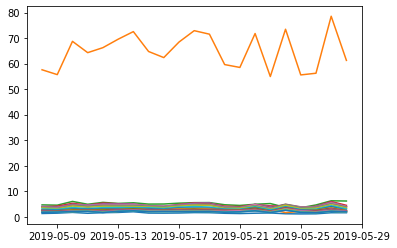

In [ ]:
plt.plot(df.groupby(['Date']).mean())

In [ ]:
import seaborn as sb

In [ ]:
ty=pd.DataFrame(df[df.columns[1:22]])

In [ ]:
ty

,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
0,0.369656,0.103913,0.086884,0.068826,0.048516,0.039741,0.035418,0.029913,0.029466,0.025976,...,0.023294,0.020248,0.020625,0.019214,0.018108,0.017386,0.016548,0.016800,0.015905,0.015076
1,0.656154,1.474255,4.627267,1.469239,0.959235,0.839052,0.823028,1.012937,1.079106,1.311306,...,1.046506,0.953086,0.955330,0.942182,0.979977,0.903851,0.952131,0.937882,1.111887,1.200273
2,0.552145,1.297831,2.486115,2.031298,1.202976,0.961624,1.082837,1.394894,1.427494,1.403778,...,1.182138,1.124457,1.032063,0.994891,0.964928,1.030770,1.112535,1.185535,1.361705,1.568834
3,0.774870,1.631865,2.824120,1.028273,0.745244,0.927399,0.705415,0.806602,1.004143,0.992865,...,0.924715,1.033693,1.041839,1.050124,1.102256,1.163101,1.139542,1.190388,1.319617,1.345745
4,0.623691,1.331148,2.299352,1.856917,1.146015,1.073988,1.180937,1.161825,1.192821,1.205832,...,0.946913,0.909206,0.935043,0.882567,0.888055,0.964639,0.966213,1.094784,1.243278,1.345621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,1.252045,3.075227,4.088337,2.659190,2.238247,1.938785,1.682353,2.351296,1.662826,1.242574,...,0.786176,0.679870,0.584432,0.566441,0.509046,0.505888,0.492192,0.436989,0.406077,0.420419
3739,0.360025,0.865376,0.732598,0.461267,0.333748,0.327298,0.313789,0.297574,0.294689,0.211830,...,0.158106,0.135696,0.128010,0.126335,0.115964,0.111600,0.102990,0.094763,0.094990,0.090712
3740,0.263939,0.569076,0.963018,0.858697,0.697680,0.633122,0.569826,0.523937,0.520395,0.441043,...,0.351824,0.332979,0.277001,0.228152,0.217388,0.177259,0.175611,0.152153,0.144844,0.141952
3741,1.604415,3.042022,3.625224,3.100474,2.585938,1.792913,1.579274,1.286690,1.226554,0.870333,...,0.620216,0.553243,0.524215,0.524033,0.461212,0.440464,0.430834,0.345542,0.301999,0.273072


In [ ]:
corr=ty.corr()

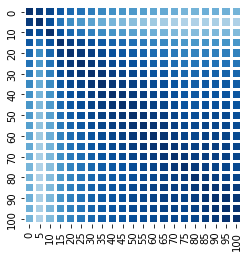

In [ ]:
#dataplot = sb.heatmap(corr, cmap="YlGnBu", annot=True)
dataplot=sb.heatmap(corr,cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 709 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 43.4 MB/s 
     |████████████████████████████████| 8.8 MB 55.4 MB/s 
     |████████████████████████████████| 98 kB 8.3 MB/s 
     |████████████████████████████████| 468 kB 63.0 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=c7e3d70153437aff4c7a13023d4e9f28dcc0c4087acb94885917627cbf1b7d36
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor-analyzer


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2,p = calculate_bartlett_sphericity(ty)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  222159.5561752764
p value :  0.0


In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_model = calculate_kmo(ty)
print(kmo_model)

(array([0.90968904, 0.86610801, 0.96668183, 0.96176718, 0.96308576,
       0.96521852, 0.96093049, 0.95470643, 0.95868129, 0.95984658,
       0.96221014, 0.96403921, 0.97055255, 0.95691927, 0.95128618,
       0.96337215, 0.96743928, 0.95402515, 0.94296778, 0.93079803,
       0.95565607]), 0.9545763933902758)


In [ ]:

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#created scaled version of DataFrame
scaled_df=pd.DataFrame(scaler.fit_transform(ty))

In [ ]:
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=21)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

In [ ]:
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.570061,-0.631125,-0.761672,-0.763798,-0.766987,-0.772066,-0.796313,-0.817647,-0.817959,-0.816162,...,-0.805338,-0.797026,-0.808680,-0.800202,-0.773490,-0.786383,-0.813929,-0.826943,-0.831469,-0.822842
1,-0.424013,-0.320582,-0.072637,-0.529294,-0.610155,-0.627274,-0.646855,-0.622512,-0.590587,-0.506846,...,-0.510742,-0.518214,-0.512745,-0.504578,-0.462927,-0.475806,-0.455454,-0.453456,-0.374791,-0.330805
2,-0.477033,-0.360562,-0.397572,-0.435176,-0.568181,-0.605071,-0.597553,-0.546691,-0.515119,-0.484592,...,-0.471692,-0.466994,-0.488450,-0.487696,-0.467786,-0.431340,-0.393994,-0.353036,-0.270696,-0.177796
3,-0.363495,-0.284864,-0.346277,-0.603135,-0.647006,-0.611270,-0.669173,-0.663470,-0.606825,-0.583479,...,-0.545807,-0.494122,-0.485355,-0.470005,-0.423447,-0.384977,-0.383646,-0.351068,-0.288233,-0.270412
4,-0.440562,-0.353012,-0.425914,-0.464376,-0.577990,-0.584716,-0.578937,-0.592957,-0.565954,-0.532228,...,-0.539416,-0.531329,-0.519168,-0.523673,-0.492606,-0.454509,-0.450058,-0.389834,-0.320042,-0.270463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,-0.120246,0.042226,-0.154423,-0.330033,-0.389900,-0.428062,-0.483788,-0.356840,-0.464142,-0.523386,...,-0.585695,-0.599874,-0.630174,-0.624927,-0.614978,-0.615234,-0.631683,-0.656562,-0.668891,-0.654563
3739,-0.574971,-0.458564,-0.663680,-0.698082,-0.717868,-0.719976,-0.743489,-0.764515,-0.760507,-0.771436,...,-0.766524,-0.762521,-0.774681,-0.765892,-0.741895,-0.753374,-0.780808,-0.795330,-0.798516,-0.791442
3740,-0.623952,-0.525711,-0.628712,-0.631531,-0.655196,-0.664577,-0.694903,-0.719581,-0.711615,-0.716276,...,-0.710750,-0.703556,-0.727509,-0.733280,-0.709147,-0.730370,-0.752983,-0.772060,-0.777742,-0.770170
3741,0.059382,0.034701,-0.224704,-0.256139,-0.330026,-0.454486,-0.503348,-0.568170,-0.558647,-0.612967,...,-0.633476,-0.637722,-0.649239,-0.638510,-0.630423,-0.638155,-0.655193,-0.693643,-0.712258,-0.715735


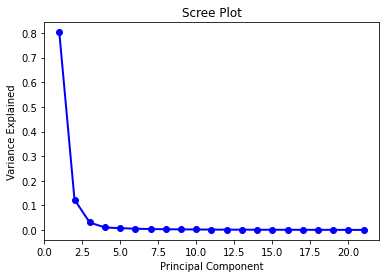

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
print(principalDf)

      principal component 1  principal component 2
0                 -3.579034              -0.157470
1                 -2.220633              -0.087152
2                 -2.057004              -0.314590
3                 -2.214824              -0.274964
4                 -2.216045              -0.236950
...                     ...                    ...
3738              -2.262931               0.618384
3739              -3.371211              -0.046814
3740              -3.204472              -0.088516
3741              -2.422638               0.737490
3742              -2.980317               0.274500

[3743 rows x 2 columns]


In [ ]:
pca.explained_variance_ratio_

array([0.80320358, 0.12312263])